In [1]:
import requests
import pandas as pd

seasonId ='188286'
matchId = '5272925'
dukeId = 61485

username= "2wsgzl0-vwx2hipkj-yxme0ub-wgjenczp83"
password= "nQv7vWe@FtES5_Z%4@F^GbtZrA*&Rh"

acc_matches = requests.get('https://apirest.wyscout.com/v3/seasons/%s/matches' % seasonId, auth=(username, password))
df_acc = pd.DataFrame(acc_matches.json()['matches'])

match_list = df_acc['matchId'].tolist()
home = []
away = []

for match in match_list:
    
    print(match)
    
    match_call = requests.get('https://apirest.wyscout.com/v3/matches/%s?useSides=1' % match, auth=(username,password))
    df_match = pd.DataFrame(match_call.json()['teamsData'])
    home_team = df_match['home'].tolist()[0]
    away_team = df_match['away'].tolist()[0]
    
    home.append(home_team)
    away.append(away_team)
    

df_games = pd.DataFrame()

df_games['game_id'] = df_acc['matchId']
df_games['competition_id'] = df_acc['competitionId']
df_games['season_id'] = df_acc['seasonId']
df_games['game_date'] = df_acc['date']
df_games['game_day'] = df_acc['gameweek']
df_games['home_team_id'] = home
df_games['away_team_id'] = away
df_games = df_games.set_index('game_id')


5296837
5295713
5295712
5295544
5295543
5272947
5272945
5272946
5272949
5272950
5272948
5272944
5272943
5272938
5272942
5272941
5272940
5272939
5272937
5272936
5272935
5272934
5272933
5272931
5272930
5272932
5272928
5272929
5272927
5272926
5272925
5272924
5272923
5272922
5272921
5272920
5272917
5272919
5272918
5272916
5272915
5272909
5272914
5272913
5272912
5272911
5272910
5272899
5272898
5272895
5272896
5272897
5272894
5272893
5272886
5272885
5272884
5272880
5272881
5272882
5272883
5272876
5272879
5272878
5272877
5272875
5272874
5272873
5272868
5272867
5272866
5272865
5272864
5272863
5270352


In [14]:
# xT per action vs. number of successful actions
import socceraction.spadl
from socceraction.vaep import VAEP
from tqdm import tqdm


VAEP_model = VAEP(nb_prev_actions=3)

# compute features and labels for each game
all_features, all_labels = [], []
for game_id, game in tqdm(list(df_games.iterrows())):
    # load the game's events
    # game_events = loaded.events(game_id)
    events=requests.get('https://apirest.wyscout.com/v2/matches/%s/events' % game_id, auth=(username,password))
    if events.status_code == 400:
        print('Match {} has no data'.format(game_id))
        continue

    events.json()
    events_df = pd.DataFrame(events.json()['events'])

    events_df.columns = ['event_id', 'player_id', 'team_id', 'game_id', 'period_id', 'milliseconds',
                         'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']

    cols = ['event_id', 'game_id', 'period_id', 'milliseconds', 'team_id', 'player_id',
                         'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']
    events_df = events_df[cols]

    events_df['period_id'] = events_df['period_id'].str.replace("H","")
    events_df['period_id'] = events_df['period_id'].str.replace("E","")
    events_df['period_id'] = events_df['period_id'].astype('int')
    
    game_events = events_df

    # convert the events to actions
    game_home_team_id = df_games.at[game_id, "home_team_id"]
    game_actions = socceraction.spadl.wyscout.convert_to_actions(game_events, game_home_team_id)
    # compute features and labels
    all_features.append(VAEP_model.compute_features(game, game_actions))
    all_labels.append(VAEP_model.compute_labels(game, game_actions))
# combine all features and labels in a single dataframe
all_features = pd.concat(all_features)
all_labels = pd.concat(all_labels)

# fit the model
VAEP_model.fit(all_features, all_labels)

  0%|          | 0/75 [00:00<?, ?it/s]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccera

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

  1%|▏         | 1/75 [00:06<07:51,  6.38s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

  3%|▎         | 2/75 [00:12<07:40,  6.30s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

Match 5295544 has no data


  7%|▋         | 5/75 [00:19<03:12,  2.75s/it]

Match 5295543 has no data


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

  8%|▊         | 6/75 [00:26<04:45,  4.14s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

  9%|▉         | 7/75 [00:32<05:31,  4.87s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

Match 5272948 has no data


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
 16%|█▌        | 12/75 [01:01<05:30,  5.25s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 17%|█▋        | 13/75 [01:07<05:40,  5.49s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 19%|█▊        | 14/75 [01:13<05:47,  5.70s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 20%|██        | 15/75 [01:19<05:55,  5.93s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 21%|██▏       | 16/75 [01:26<05:53,  5.99s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 23%|██▎       | 17/75 [01:32<05:51,  6.05s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 24%|██▍       | 18/75 [01:38<05:49,  6.14s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 25%|██▌       | 19/75 [01:44<05:36,  6.01s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 27%|██▋       | 20/75 [01:50<05:32,  6.05s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 36%|███▌      | 27/75 [02:30<04:34,  5.72s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 37%|███▋      | 28/75 [02:35<04:24,  5.64s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

Match 5272909 has no data


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 57%|█████▋    | 43/75 [03:57<02:30,  4.69s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 61%|██████▏   | 46/75 [04:14<02:37,  5.42s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 63%|██████▎   | 47/75 [04:20<02:35,  5.54s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 64%|██████▍   | 48/75 [04:26<02:32,  5.64s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
 65%|██████▌   | 49/75 [04:32<02:30,  5.78s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 67%|██████▋   | 50/75 [04:38<02:24,  5.80s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 68%|██████▊   | 51/75 [04:44<02:19,  5.82s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 69%|██████▉   | 52/75 [04:50<02:13,  5.81s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 71%|███████   | 53/75 [04:55<02:06,  5.74s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 72%|███████▏  | 54/75 [05:01<02:00,  5.76s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 73%|███████▎  | 55/75 [05:07<01:56,  5.81s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 75%|███████▍  | 56/75 [05:13<01:49,  5.76s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 76%|███████▌  | 57/75 [05:19<01:44,  5.82s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 77%|███████▋  | 58/75 [05:24<01:38,  5.81s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 83%|████████▎ | 62/75 [05:47<01:13,  5.67s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 84%|████████▍ | 63/75 [05:52<01:08,  5.70s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 85%|████████▌ | 64/75 [05:58<01:01,  5.60s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 87%|████████▋ | 65/75 [06:04<00:56,  5.66s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 89%|████████▉ | 67/75 [06:16<00:46,  5.82s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 91%|█████████ | 68/75 [06:21<00:39,  5.70s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 95%|█████████▍| 71/75 [06:36<00:21,  5.32s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 96%|█████████▌| 72/75 [06:42<00:16,  5.40s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

 97%|█████████▋| 73/75 [06:49<00:11,  5.82s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
 99%|█████████▊| 74/75 [06:54<00:05,  5.80s/it]C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-package

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

[0]	validation_0-auc:0.67265
[1]	validation_0-auc:0.68326
[2]	validation_0-auc:0.72203
[3]	validation_0-auc:0.72515
[4]	validation_0-auc:0.74665
[5]	validation_0-auc:0.75488
[6]	validation_0-auc:0.76084
[7]	validation_0-auc:0.76485
[8]	validation_0-auc:0.76688
[9]	validation_0-auc:0.76615
[10]	validation_0-auc:0.76998
[11]	validation_0-auc:0.77021
[12]	validation_0-auc:0.77232
[13]	validation_0-auc:0.77897
[14]	validation_0-auc:0.77717
[15]	validation_0-auc:0.77693
[16]	validation_0-auc:0.78204
[17]	validation_0-auc:0.78349
[18]	validation_0-auc:0.78743
[19]	validation_0-auc:0.78850
[20]	validation_0-auc:0.79110
[21]	validation_0-auc:0.79140
[22]	validation_0-auc:0.79244
[23]	validation_0-auc:0.79539
[24]	validation_0-auc:0.79571
[25]	validation_0-auc:0.79803
[26]	validation_0-auc:0.79799
[27]	validation_0-auc:0.79710
[28]	validation_0-auc:0.79925
[29]	validation_0-auc:0.79931
[30]	validation_0-auc:0.80623
[31]	validation_0-auc:0.80786
[32]	validation_0-auc:0.80768
[33]	validation_0-au

In [15]:
match = 5272944
match_call = requests.get('https://apirest.wyscout.com/v3/matches/%s?useSides=1' % match, auth=(username,password))
df = pd.DataFrame(match_call.json()['teamsData'])
df

home  \
teamId                                                    61494   
side                                                       home   
score                                                         0   
scoreHT                                                       0   
scoreET                                                       0   
scoreP                                                        0   
coachId                                                  688354   
hasFormation                                                  1   
formation     {'lineup': [{'playerId': 688346, 'goals': '0',...   

                                                           away  
teamId                                                    61485  
side                                                       away  
score                                                         1  
scoreHT                                                       1  
scoreET                                                       0  
scoreP                                                        0  
coachId                                                  684883  
hasFormation                                                  1  
formation     {'lineup': [{'playerId': 684875, 'goals': '0',...

In [16]:
events=requests.get('https://apirest.wyscout.com/v2/matches/%s/events' % match, auth=(username,password))


events.json()
events_df = pd.DataFrame(events.json()['events'])

events_df.columns = ['event_id', 'player_id', 'team_id', 'game_id', 'period_id', 'milliseconds',
                     'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']

cols = ['event_id', 'game_id', 'period_id', 'milliseconds', 'team_id', 'player_id',
                     'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']
events_df = events_df[cols]

events_df['period_id'] = events_df['period_id'].str.replace("H","")
events_df['period_id'] = events_df['period_id'].str.replace("E","")
events_df['period_id'] = events_df['period_id'].astype('int')

game_events = events_df

# convert the events to actions
game_home_team_id = df_games.at[game_id, "home_team_id"]
game_actions = socceraction.spadl.wyscout.convert_to_actions(game_events, game_home_team_id)

In [17]:
# rate a game
ratings = VAEP_model.rate(df_games.loc[match], game_actions)

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

In [18]:
ratings

offensive_value  defensive_value  vaep_value
0            0.000000        -0.000000    0.000000
1           -0.004930        -0.006041   -0.010971
2            0.000519         0.005084    0.005604
3            0.000486         0.003125    0.003611
4           -0.001257        -0.000004   -0.001261
...               ...              ...         ...
1374        -0.001421         0.000960   -0.000461
1375         0.001400        -0.005409   -0.004009
1376        -0.004580         0.000682   -0.003898
1377        -0.003072        -0.016505   -0.019576
1378        -0.020164        -0.007463   -0.027627

[1379 rows x 3 columns]

In [19]:
import socceraction.spadl
df_actions = socceraction.spadl.wyscout.convert_to_actions(events_df, 61485)

team_id = 61485
team_data = requests.get('https://apirest.wyscout.com/v3/teams/%s' % team_id, auth=(username, password))
players = requests.get('https://apirest.wyscout.com/v3/teams/%s/squad' % team_id, auth=(username, password))

team = team_data.json()['name']

player_df_1=pd.DataFrame(players.json()['squad'])
player_df_1.columns = ['player_id', 'nickname', 'firstname', 'middlename', 'lastname', 'height', 'weight', 'birth_date',
                     'birth_area', 'passport_area', 'role', 'foot', 'team_id', 'currentNationalTeamId', 'gender',
                     'status', 'image_data_url']

player_df_1 = player_df_1.drop(['middlename', 'height', 'weight', 'birth_area', 'passport_area', 'role', 'foot', 'currentNationalTeamId',
                'gender', 'status', 'image_data_url'], axis=1)
player_df_1['player_name'] = player_df_1['firstname'] + ' ' + player_df_1['lastname']

player_df_1['team_name'] = team


team_id_2 = 61494
team_data_2 = requests.get('https://apirest.wyscout.com/v3/teams/%s' % team_id_2, auth=(username, password))
players_2 = requests.get('https://apirest.wyscout.com/v3/teams/%s/squad' % team_id_2, auth=(username, password))

team_2 = team_data_2.json()['name']

player_df_2=pd.DataFrame(players_2.json()['squad'])
player_df_2.columns = ['player_id', 'nickname', 'firstname', 'middlename', 'lastname', 'height', 'weight', 'birth_date',
                     'birth_area', 'passport_area', 'role', 'foot', 'team_id', 'currentNationalTeamId', 'gender',
                     'status', 'image_data_url']

player_df_2 = player_df_2.drop(['middlename', 'height', 'weight', 'birth_area', 'passport_area', 'role', 'foot', 'currentNationalTeamId',
                'gender', 'status', 'image_data_url'], axis=1)
player_df_2['player_name'] = player_df_2['firstname'] + ' ' + player_df_2['lastname']

player_df_2['team_name'] = team_2
player_df = pd.concat([player_df_1, player_df_2])

In [20]:
import socceraction.xthreat as xthreat
url_grid = "https://karun.in/blog/data/open_xt_12x8_v1.json"
xT_model = xthreat.load_model(url_grid)

df_actions_ltr = socceraction.spadl.play_left_to_right(df_actions, team_id)
df_actions["xT_value"] = xT_model.rate(df_actions_ltr)
df_actions

game_id  period_id  time_seconds  team_id  player_id  start_x  start_y  \
0     5272944          1      0.004447    61485     655938    51.45    33.32   
1     5272944          1      0.005706    61485     684881    33.60    32.64   
2     5272944          1      0.007861    61485     684852    23.10    34.68   
3     5272944          1      0.011170    61485     684862    29.40    19.72   
4     5272944          1      0.014270    61485     684852    26.25    34.68   
...       ...        ...           ...      ...        ...      ...      ...   
1374  5272944          2      2.767000    61494     688342    63.00    57.80   
1375  5272944          2      2.771000    61485     684862    31.50    33.32   
1376  5272944          2      2.774000    61494     559256    58.80    26.52   
1377  5272944          2      2.776000    61494     688332    33.60    42.84   
1378  5272944          2      2.784000    61485          0     6.30    47.60   

      end_x  end_y original_event_id  bodypart_id  type_id  result_id  \
0     33.60  32.64        1092780350            0        0          1   
1     23.10  34.68        1092780351            0        0          1   
2     29.40  19.72        1092780352            0        0          1   
3     26.25  34.68        1092780353            0        0          1   
4     29.40  56.44        1092780354            0        0          1   
...     ...    ...               ...          ...      ...        ...   
1374  37.80  45.56        1092782644            0        0          1   
1375  58.80  26.52        1092781648            0        0          0   
1376  33.60  42.84        1092782646            0        0          1   
1377  12.60  48.28        1092782647            0        0          2   
1378   6.30  47.60        1092781649            0        4          0   

      action_id  xT_value  
0             0 -0.003522  
1             1 -0.001158  
2             2  0.000939  
3             3  0.000219  
4             4 -0.000729  
...         ...       ...  
1374       1374  0.007204  
1375       1375       NaN  
1376       1376  0.009276  
1377       1377       NaN  
1378       1378       NaN  

[1379 rows x 15 columns]

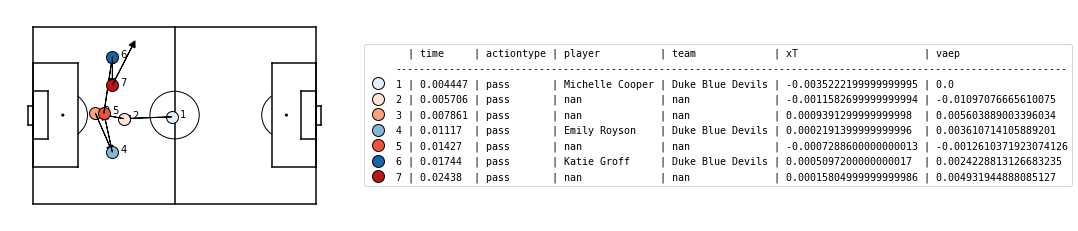

game_id  period_id  time_seconds  team_id  player_id  start_x  start_y  \
0  5272944          1      0.004447    61485     655938    51.45    33.32   
1  5272944          1      0.005706    61485     684881    33.60    32.64   
2  5272944          1      0.007861    61485     684852    23.10    34.68   
3  5272944          1      0.011170    61485     684862    29.40    19.72   
4  5272944          1      0.014270    61485     684852    26.25    34.68   
5  5272944          1      0.017440    61485     684870    29.40    56.44   
6  5272944          1      0.024380    61485     684852    29.40    45.56   

   end_x  end_y original_event_id  ...  result_name  bodypart_name  xT_value  \
0  33.60  32.64        1092780350  ...      success           foot -0.003522   
1  23.10  34.68        1092780351  ...      success           foot -0.001158   
2  29.40  19.72        1092780352  ...      success           foot  0.000939   
3  26.25  34.68        1092780353  ...      success           foot  0.000219   
4  29.40  56.44        1092780354  ...      success           foot -0.000729   
5  29.40  45.56        1092780355  ...      success           foot  0.000510   
6  37.80  62.56        1092780356  ...      success           foot  0.000158   

   vaep_value   nickname firstname lastname  birth_date      player_name  \
0    0.000000  M. Cooper  Michelle   Cooper  2002-12-04  Michelle Cooper   
1   -0.010971        NaN       NaN      NaN         NaN              NaN   
2    0.005604        NaN       NaN      NaN         NaN              NaN   
3    0.003611  E. Royson     Emily   Royson  2002-09-10     Emily Royson   
4   -0.001261        NaN       NaN      NaN         NaN              NaN   
5    0.002423   K. Groff     Katie    Groff  2002-01-12      Katie Groff   
6    0.004932        NaN       NaN      NaN         NaN              NaN   

          team_name  
0  Duke Blue Devils  
1               NaN  
2               NaN  
3  Duke Blue Devils  
4               NaN  
5  Duke Blue Devils  
6               NaN  

[7 rows x 25 columns]

In [21]:
import matplotsoccer as mps

# Select relevant actions
df_actions_goal1 = df_actions.loc[0:6]

# Replace result, actiontype and bodypart IDs by their corresponding name
df_actions_goal2 = socceraction.spadl.add_names(df_actions_goal1.drop('xT_value',axis=1))
df_actions_goal2['xT_value'] = df_actions.loc[0:6]['xT_value'].tolist()
df_actions_goal2['vaep_value'] = ratings.loc[0:6]['vaep_value'].tolist()
# Add team and player names
df_actions_goal3 = df_actions_goal2.merge(player_df, how='left').merge(player_df_2, how='left')
# Create the plot
mps.actions(
    location=df_actions_goal3[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_goal3.type_name,
    team=df_actions_goal3.team_name,
    result=df_actions_goal3.result_name == "success",
    label=df_actions_goal3[["time_seconds", "type_name", "player_name", "team_name", 'xT_value', 'vaep_value']],
    labeltitle=["time", "actiontype", "player", "team", 'xT', 'vaep'],
    zoom=False
)
df_actions_goal3.head(20)

In [22]:
seasonId ='188286'
dukeId = 61485

username= "2wsgzl0-vwx2hipkj-yxme0ub-wgjenczp83"
password= "jAK?RKSvw(,^I:L,(nvN?Y1eI$c?GT"

acc_matches = requests.get('https://apirest.wyscout.com/v3/seasons/%s/matches' % seasonId, auth=(username, password))
duke_matches = requests.get('https://apirest.wyscout.com/v3/teams/%s/matches' % dukeId, auth=(username, password))
df_acc=pd.DataFrame(acc_matches.json()['matches'])
df_duke = pd.DataFrame(duke_matches.json()['matches'])

duke_match_list = df_duke['matchId'].tolist()

# duke roster
team_id = 61485
team_data = requests.get('https://apirest.wyscout.com/v3/teams/%s' % team_id, auth=(username, password))
players = requests.get('https://apirest.wyscout.com/v3/teams/%s/squad' % team_id, auth=(username, password))

team = team_data.json()['name']

player_df_1=pd.DataFrame(players.json()['squad'])
player_df_1.columns = ['player_id', 'nickname', 'firstname', 'middlename', 'lastname', 'height', 'weight', 'birth_date',
                     'birth_area', 'passport_area', 'role', 'foot', 'team_id', 'currentNationalTeamId', 'gender',
                     'status', 'image_data_url']

player_df_1 = player_df_1.drop(['middlename', 'height', 'weight', 'birth_area', 'passport_area', 'role', 'foot', 'currentNationalTeamId',
                'gender', 'status', 'image_data_url'], axis=1)
player_df_1['player_name'] = player_df_1['firstname'] + ' ' + player_df_1['lastname']

player_df_1['team_name'] = team

# duke player data structures
duke_vaep = pd.DataFrame(player_df_1['player_name'])
duke_vaep['vaep_sum'] = 0
duke_vaep['vaep_count'] = 0
duke_vaep['vaep_pass_sum'] = 0
duke_vaep['vaep_pass_count'] = 0
duke_vaep['vaep_dribble_sum'] = 0
duke_vaep['vaep_dribble_count'] = 0


count = 0
sophie_sum = []
# loop through matches
for match in match_list:                         # duke match list has games from spring, not in acc season match list
    
    
    
    match_call = requests.get('https://apirest.wyscout.com/v3/matches/%s?useSides=1' % match, auth=(username,password))
    df_match = pd.DataFrame(match_call.json()['teamsData'])
    home_team = df_match['home'].tolist()[0]
    away_team = df_match['away'].tolist()[0]
    
    if home_team == dukeId or away_team == dukeId:
    
        # create and format event df
        events=requests.get('https://apirest.wyscout.com/v2/matches/%s/events' % match, auth=(username,password))

        if events.status_code == 400:
            print('Match {} has no data'.format(match))
            continue

        events.json()
        events_df = pd.DataFrame(events.json()['events'])

        events_df.columns = ['event_id', 'player_id', 'team_id', 'game_id', 'period_id', 'milliseconds',
                             'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']

        cols = ['event_id', 'game_id', 'period_id', 'milliseconds', 'team_id', 'player_id',
                             'type_id', 'type_name', 'subtype_id', 'subtype_name', 'positions', 'tags']
        events_df = events_df[cols]

        events_df['period_id'] = events_df['period_id'].str.replace("H","")
        events_df['period_id'] = events_df['period_id'].str.replace("E","")
        events_df['period_id'] = events_df['period_id'].astype('int')


        import socceraction.spadl
        df_actions = socceraction.spadl.wyscout.convert_to_actions(events_df, team_id)


        # opponent roster
        team_ids = events_df['team_id'].unique()
        for team in team_ids:
            if team != 61485:
                opponent = team

        team_id_2 = opponent
        team_data_2 = requests.get('https://apirest.wyscout.com/v3/teams/%s' % team_id_2, auth=(username, password))
        players_2 = requests.get('https://apirest.wyscout.com/v3/teams/%s/squad' % team_id_2, auth=(username, password))

        team_2 = team_data_2.json()['name']

        player_df_2=pd.DataFrame(players_2.json()['squad'])
        player_df_2.columns = ['player_id', 'nickname', 'firstname', 'middlename', 'lastname', 'height', 'weight', 'birth_date',
                             'birth_area', 'passport_area', 'role', 'foot', 'team_id', 'currentNationalTeamId', 'gender',
                             'status', 'image_data_url']

        player_df_2 = player_df_2.drop(['middlename', 'height', 'weight', 'birth_area', 'passport_area', 'role', 'foot', 'currentNationalTeamId',
                        'gender', 'status', 'image_data_url'], axis=1)
        player_df_2['player_name'] = player_df_2['firstname'] + ' ' + player_df_2['lastname']

        player_df_2['team_name'] = team_2

        # combined rosters
        player_df = pd.concat([player_df_1, player_df_2])


        # convert the events to actions
        game_home_team_id = df_games.at[match, "home_team_id"]
        game_actions = socceraction.spadl.wyscout.convert_to_actions(events_df, game_home_team_id)


        # rate a game
        ratings = VAEP_model.rate(df_games.loc[match], game_actions)


        import socceraction.xthreat as xthreat
        url_grid = "https://karun.in/blog/data/open_xt_12x8_v1.json"
        xT_model = xthreat.load_model(url_grid)

        df_actions_ltr = socceraction.spadl.play_left_to_right(df_actions, team_id)
        df_actions["xT_value"] = xT_model.rate(df_actions_ltr)


        # Select relevant actions
        df_actions_goal1 = df_actions # .loc[0:20]
        # Replace result, actiontype and bodypart IDs by their corresponding name
        df_actions_goal2 = socceraction.spadl.add_names(df_actions_goal1.drop('xT_value',axis=1))
        df_actions_goal2['xT_value'] = df_actions['xT_value'].tolist()
        df_actions_goal2['vaep_value'] = ratings['vaep_value'].tolist()
        # Add team and player names
        df_actions_goal3 = df_actions_goal2.merge(player_df, how='left').merge(player_df_2, how='left') # ???


        print(match, count)
        count += 1

        # loop through players and add stats to appropriate dfs
        for player in player_df_1['player_name']:


            if player in set(df_actions_goal3['player_name']):

                ind = duke_vaep.index[duke_vaep['player_name'] == player][0]

                df_player = df_actions_goal3.loc[df_actions_goal3['player_name']  == player]

                # need to store and sum up number of actions and then take average

                # average vaep of all successful actions
                action_count = len(df_player)
                player_total_vaep = df_player.agg('sum')['vaep_value']
                # player_successes_total_threat_avg = player_successes_total_threat / success_length
                duke_vaep.at[ind, 'vaep_sum'] += player_total_vaep
                duke_vaep.at[ind, 'vaep_count'] += action_count
                
                if player == 'Sophie Jones':
                    sophie_sum.append(player_total_vaep)
                
                
                if 'pass' in set(df_player['type_name']):
                    df_player_pass = df_player[df_player['type_name'] == 'pass']
                    action_count_pass = len(df_player_pass)
                    player_pass_vaep = df_player_pass.agg('sum')['vaep_value']
                    duke_vaep.at[ind, 'vaep_pass_sum'] += player_pass_vaep
                    duke_vaep.at[ind, 'vaep_pass_count'] += action_count_pass
                    
                    
                if 'dribble' in set(df_player['type_name']):
                    df_player_dribble = df_player[df_player['type_name'] == 'dribble']
                    action_count_dribble = len(df_player_dribble)
                    player_dribble_vaep = df_player_dribble.agg('sum')['vaep_value']
                    duke_vaep.at[ind, 'vaep_dribble_sum'] += player_dribble_vaep
                    duke_vaep.at[ind, 'vaep_dribble_count'] += action_count_dribble
print(sophie_sum)

Match 5295544 has no data


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272944 0


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272938 1


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272934 2


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272925 3


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272920 4


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272911 5


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272895 6


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272886 7


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

5272879 8


C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]
C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: Performanc

C:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\socceraction\vaep\features.py:247: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tyscol + '_' + rescol] = tys[tyscol] & res[rescol]


5272865 9
[0.08505228394642472, 0.12166917754802853, -0.10221441532485187, 0.2548506419407204, 0.016871793544851243, 0.3611089364858344, 0.23355900589376688, 0.14534439524868503, 0.3157702342723496, -0.008887001196853817]


In [23]:
duke_vaep['avg_vaep'] = duke_vaep['vaep_sum'] / duke_vaep['vaep_count']
duke_vaep['avg_pass_vaep'] = duke_vaep['vaep_pass_sum'] / duke_vaep['vaep_pass_count']
duke_vaep['avg_dribble_vaep'] = duke_vaep['vaep_dribble_sum'] / duke_vaep['vaep_dribble_count']
duke_vaep = duke_vaep.sort_values(by=['avg_vaep'], ascending=False)
duke_vaep

player_name  vaep_sum  vaep_count  vaep_pass_sum  vaep_pass_count  \
18    Kelly  Wilson  0.271274           8       0.279794                6   
1   Michelle Cooper  4.561917         403      -0.020491              228   
4     Grace Watkins  1.918536         249       0.002598              126   
17  Baleigh Bruster  0.074360          13       0.051327                8   
15     Ruthie Jones  1.826536         331       1.032252              189   
14  Mackenzie Pluck  2.664639         516       0.711034              248   
6     Julia Burnell  0.032071           7       0.019847                6   
12      Katie Groff  4.717173        1030       2.415552              690   
10     Nicole Chico  1.071604         304      -0.003210              194   
16    Dieynaba Ndaw  0.019075           7       0.018001                6   
3       Sarah Piper  0.061384          23       0.028938               16   
11    Maggie Graham  0.808406         351      -0.059045              268   
9      Emily Royson  2.031753         946       1.747977              670   
0      Sophie Jones  1.423125         758       1.311042              590   
7        Emmy Duerr  0.082248          46      -0.086449               29   
13   Delaney Graham  0.504126         667       0.869733              405   
5      Olivia Migli  0.198818         294       0.088905              164   
2      Jenna Royson  0.000000           0       0.000000                0   
8      Julia Hannon  0.000000           0       0.000000                0   
19        Kat Rader  0.000000           0       0.000000                0   
20       Elle Piper  0.000000           0       0.000000                0   
21      Devin Lynch  0.000000           0       0.000000                0   
22   Carina Lageyre  0.000000           0       0.000000                0   
23     Taylor Evans  0.000000           0       0.000000                0   
24   Caroline Duffy  0.000000           0       0.000000                0   

    vaep_dribble_sum  vaep_dribble_count  avg_vaep  avg_pass_vaep  \
18         -0.009218                   1  0.033909       0.046632   
1           1.312026                  87  0.011320      -0.000090   
4           0.767717                  52  0.007705       0.000021   
17          0.005817                   1  0.005720       0.006416   
15          0.055809                  24  0.005518       0.005462   
14          1.249569                 110  0.005164       0.002867   
6           0.000000                   0  0.004582       0.003308   
12          0.293195                 105  0.004580       0.003501   
10          0.066131                  38  0.003525      -0.000017   
16          0.001074                   1  0.002725       0.003000   
3           0.017524                   4  0.002669       0.001809   
11          0.143856                  43  0.002303      -0.000220   
9           0.201455                 127  0.002148       0.002609   
0           0.181378                  90  0.001877       0.002222   
7          -0.041010                  13  0.001788      -0.002981   
13          0.077052                  89  0.000756       0.002147   
5           0.316050                  51  0.000676       0.000542   
2           0.000000                   0       NaN            NaN   
8           0.000000                   0       NaN            NaN   
19          0.000000                   0       NaN            NaN   
20          0.000000                   0       NaN            NaN   
21          0.000000                   0       NaN            NaN   
22          0.000000                   0       NaN            NaN   
23          0.000000                   0       NaN            NaN   
24          0.000000                   0       NaN            NaN   

    avg_dribble_vaep  
18         -0.009218  
1           0.015081  
4           0.014764  
17          0.005817  
15          0.002325  
14          0.011360  
6                NaN  
12          0.002792  
10 

In [24]:
# collect vaep stats over course of season like done for xthreat
# get grad student names
# xthreat for all acc teams
# acc xthreat averages
# acc vaep averages
# plots
# check dribbling success rates